## Machine Learning & Statistics Tasks 

***

Author: Emma Dunleavy

Student Number: g00425660

Module Machine Learning & Statistics Winter 2023/24 4679

Lecturer: Ian McLoughlin
***

Import required libraries/statistics packages.

In [382]:
# Statistics.
import scipy.stats as ss
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway

# Mathmatical operations
import numpy as np

# Data frames.
import pandas as pd

# Statistical data visualisation
import seaborn as sns

# Data visualisation
import matplotlib.pyplot as plt

# Machine Learning.
import sklearn as sk
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

# Preprocessing.
import sklearn.preprocessing as pre

# Decomposition.
import sklearn.decomposition as dec

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

### Task 1 - Square Roots

***

>Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such as `math`. In this task, you should write a function `sqrt(x)` to approximate the square root of a floating point number $x$ without using the power operator or a package.

>Rather, you should use Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly improve it using the following formula, until the difference between some previous guess $z_i$ and the next $z_{i + 1}$ is less than some threshold, say 0.01.

$$ z_{i+1} = z_i - \frac{z_i * z_i - x} {2z_i}$$


In [383]:
def sqrt(no, error=0.00000001):                     
    guess = no                                      # first guess is the number inputted
    diff = 99999999
    while diff > error:
        new_guess = guess - ((guess**2 - no) / (2*guess)) # Newtons method
        diff = new_guess - guess
        if diff < 0:
            diff *= -1                                     # to convert to an absolute value

        guess = new_guess                                  # update existing guess
    return guess

no = float(input("Please enter a positive number: "))  #to input a positive floating point number

print (f"The square root of {no} is ~", (sqrt (no))) # to print approximate sq rt of original inputted value 

The square root of 9.0 is ~ 3.0


In [384]:
x = 8.0

Output 

*The square root of 8.0 is ~ 2.8284271247461903*

Test using double asterisk.

In [385]:
8**0.5

2.8284271247461903

Output 

*2.8284271247461903*

Confirms the code correctly determines the square root using Newton's method.

In [386]:
z = 4

In [387]:
z = z - (((z * z) - x) / (2 * z))

z

3.0

In [388]:
z = 4 - ((4 * 4)-8) / (2 * 4)

z

3.0

### Task 2 - Chi-Square Test

***

Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits. Use `scipy.stats` to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

<center>

   | |  |   Biscuit |   |   
|---:|:-------------|:-----------:|:------:|
| |   |       Chocolate |  Plain  |   
|**Drink** |  Coffee  |       43  |  57  |   
| | Tea  |  56   |  45   |    


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html


In [389]:
# Assign the contingency table to an array called table.
table = np.array([[43, 57], [56, 45]])

# Show.
table

array([[43, 57],
       [56, 45]])

In [390]:
# Using chi2_contingency from scipy.stats pass in table, with Yeats correction factor set to False.

result = chi2_contingency(table, correction = False)

# Show.
result

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

### Task 2 Conclusion 

Using a significance level of `5%`, as the `pvalue` is $> 0.05$ we would accept the null hypothesis; that there is no relationship between tea and coffee drinks and their preferance to chocolate and plain biscuits. 

### Task 3  - t-Test on Penguin Data Set
***


Perform a t-test on the famous penguins data set to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

In [391]:
# Get data frame from raw data in url.
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")

# Show.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [392]:
# Replacing inf and -inf with NaN to deal with Future Warnings
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [393]:
# Define sample set male_sample, the body mass of the males in the data set.
male_sample = df[df["sex"] == "MALE"]["body_mass_g"].to_numpy()

# Show.
male_sample


array([3750., 3650., 4675., 3800., 4400., 4500., 4200., 3600., 3950.,
       3800., 3550., 3950., 3900., 3900., 4150., 3950., 4650., 3900.,
       4400., 4600., 3425., 4150., 4300., 4050., 3700., 3800., 3750.,
       4400., 4050., 3950., 4100., 4450., 3900., 4150., 4250., 3900.,
       4000., 4700., 4200., 3550., 3800., 3950., 4300., 4450., 4300.,
       4350., 4100., 4725., 4250., 3550., 3900., 4775., 4600., 4275.,
       4075., 3775., 3325., 3500., 3875., 4000., 4300., 4000., 3500.,
       4475., 3900., 3975., 4250., 3475., 3725., 3650., 4250., 3750.,
       4000., 3900., 3650., 3725., 3750., 3700., 3775., 4050., 4050.,
       3300., 4400., 3400., 3800., 4150., 3800., 4550., 4300., 4100.,
       3600., 4800., 4500., 3950., 3550., 4450., 4300., 3250., 3950.,
       4050., 3450., 4050., 3800., 3950., 4000., 3775., 4100., 5700.,
       5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300., 5350.,
       5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400., 5250.,
       5350., 5700.,

In [394]:
# Define sample set female_sample, the body mass of the females in the data set.
female_sample = df[df["sex"] == "FEMALE"]["body_mass_g"].to_numpy()

# Show.
female_sample

array([3800., 3250., 3450., 3625., 3200., 3700., 3450., 3325., 3400.,
       3800., 3800., 3200., 3150., 3250., 3300., 3325., 3550., 3300.,
       3150., 3100., 3000., 3450., 3500., 3450., 2900., 3550., 2850.,
       3150., 3600., 2850., 3350., 3050., 3600., 3550., 3700., 3700.,
       3550., 3200., 3800., 3350., 3500., 3600., 3550., 3400., 3300.,
       3700., 2900., 3725., 3075., 2925., 3750., 3175., 3825., 3200.,
       3900., 2900., 3350., 3150., 3450., 3050., 3275., 3050., 3325.,
       3500., 3425., 3175., 3400., 3400., 3050., 3000., 3475., 3450.,
       3700., 3500., 3525., 3950., 3250., 4150., 3800., 3700., 3575.,
       3700., 3450., 3600., 2900., 3300., 3400., 3700., 3200., 3350.,
       3900., 3850., 2700., 3650., 3500., 3675., 3400., 3675., 3325.,
       3600., 3350., 3250., 3525., 3650., 3650., 3400., 3775., 4500.,
       4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150., 4800.,
       5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950., 4350.,
       3950., 4300.,

Text(0.5, 1.0, 'Histogram of the Body Mass of Male (blue) and Female (orange) Penguins ')

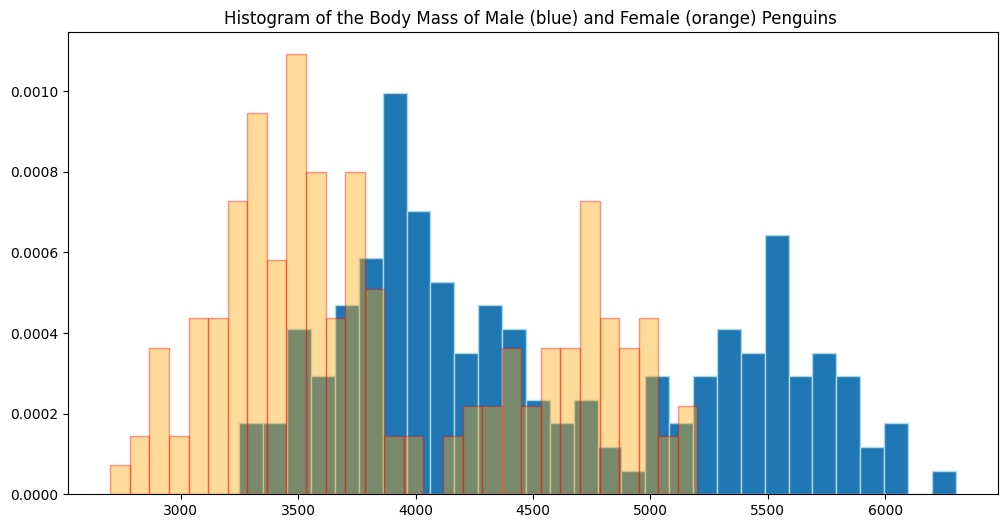

In [395]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(male_sample, bins=30, density=True, ec="lightblue" )
ax.hist(female_sample, bins=30, density=True, alpha=0.40, color= 'orange', ec="red")
plt.title("Histogram of the Body Mass of Male (blue) and Female (orange) Penguins ")

In [396]:
# Do t-Test.

ss.ttest_ind(male_sample, female_sample)

Ttest_indResult(statistic=8.541720337994516, pvalue=4.897246751596224e-16)

The t-statistic is a measure of the difference between the two sets expressed in units of standard error.


Sample sizes are different therefore the t-test for unequal sample sizes mst be used. 

#### Independent two-sample t-test, with unequal sample sizes

### $ t = {\frac {\bar X_1 - \bar X_2}{s_p \cdot \sqrt {\frac{1}{n_1} + \frac {1}{n_2}}}}$

where

### $s_p = \sqrt{\frac{{(n_1 - 1)s_1^2 + (n_2 - 1)s_2^2}}{{n_1 + n_2 - 2}}}$

In [397]:
# Get number of males in the sample
n1 = df["sex"].value_counts()["MALE"]

In [398]:
# Get number of females in the sample.
n2 = df["sex"].value_counts()["FEMALE"]

In [399]:
# Get mean of male_sample body mass
male_mean = male_sample.mean()

# Show.
male_mean

4545.684523809524

In [400]:
# Get mean of female_sample body mass
female_mean = female_sample.mean()

# Show.
female_mean

3862.2727272727275

In [401]:
# Get male standard deviation of body mass.
s1 = np.std(male_sample, ddof=1)

# Show.
s1

787.6288841581744

In [402]:
# Get female standard deviation.
s2 = np.std(female_sample, ddof=1)

# Show.
s2

666.1720495161449

In [403]:
# Calculate sp
a = ((n1 - 1)*(s1**2)) + ((n2 -1)*(s2**2))
b = n1 + n2 - 2

sp = np.sqrt(a/b)

# Show.
sp

729.9811051791228

In [404]:
# Calculate t

a1 = male_mean - female_mean
b1 = sp*np.sqrt((1/n1)+(1/n2))

t = a1/b1

# Show.
t

8.541720337994514

Text(0.5, 1.0, 'Independent Sample T-Test of the Body Mass of Male and Female Penguins ')

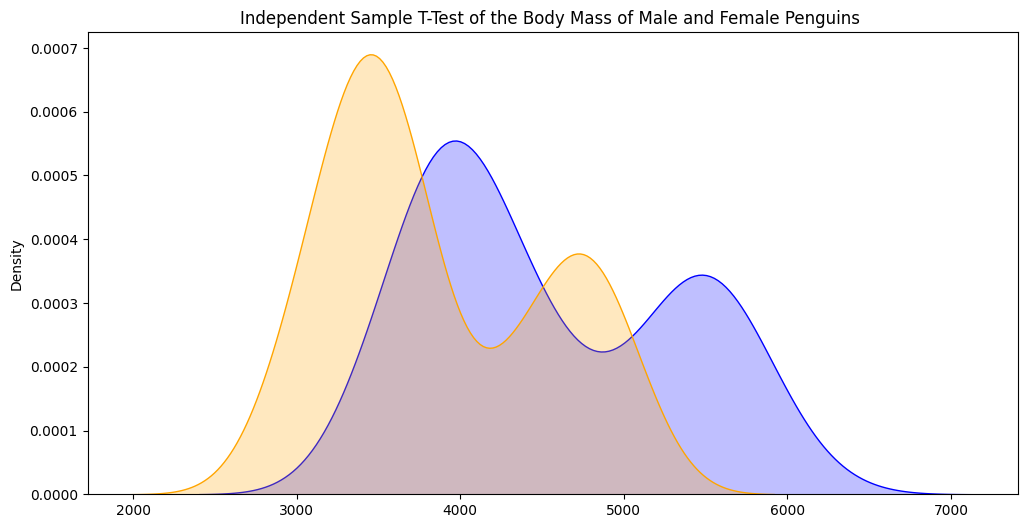

In [405]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))
                       
# Kernel density estimate plot.
sns.kdeplot(male_sample, fill=True, color="Blue")
sns.kdeplot(female_sample, fill=True, color="Orange")
plt.title("Independent Sample T-Test of the Body Mass of Male and Female Penguins ")

#### Task 3 Conclusion


The task was to investigate whether there is evidence of a significant difference in the body mass of male and female gentoo penguins. The null hypothesis states there is no significant difference between the mean values of the two populations of penguins, the male population and the female population. The t-test is completed using two sample sets within the population, and when ran a p-value of $4.897e-16$ is observed. This indicates there is a very low probability that the mean values of the two populations are the same and we reject the null hypothesis and can instead state there is a significant difference in the body mass of male and female gentoo penguins. 

### Task 4  - Iris Data Set
***

Using the famous iris data set, suggest whether the setosa class is easily separable from the other two classes. Provide evidence for your answer.


### Sepal Length V's Sepal Width 

In [406]:
# Load the scikit iris dataset.
iris = load_iris(as_frame=True)

# Define the X and y variables 
X = iris.data[["sepal length (cm)", "sepal width (cm)"]]
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [407]:
# Standardise the features by removing the mean and scaling to unit variance, define KNN classification

clf = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))])

In [408]:
# Fit the data.
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=11))])

In [409]:
# Evaluate the classifier's performance
y_pred = clf.predict(X_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.71


In [410]:
clf = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=7))])

In [411]:
# Fit the data.
clf.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=7))])

In [412]:
# Run cross-validation with five folds.
sk.model_selection.cross_val_score(clf, X, y)

array([0.73333333, 0.86666667, 0.7       , 0.86666667, 0.66666667])

In [413]:
# Evaluate the classifier's performance
y_pred = clf.predict(X_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.71


Reducing the number of neighbours from $11$ to $7$ improved the `accuracy_score` from $0.63$ to $0.92$. WHY??? What impact did it have on the cross validation?

### Petal Length V's Petal Width

In [414]:
X = iris.data[["petal length (cm)", "petal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

In [415]:
clf = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))])

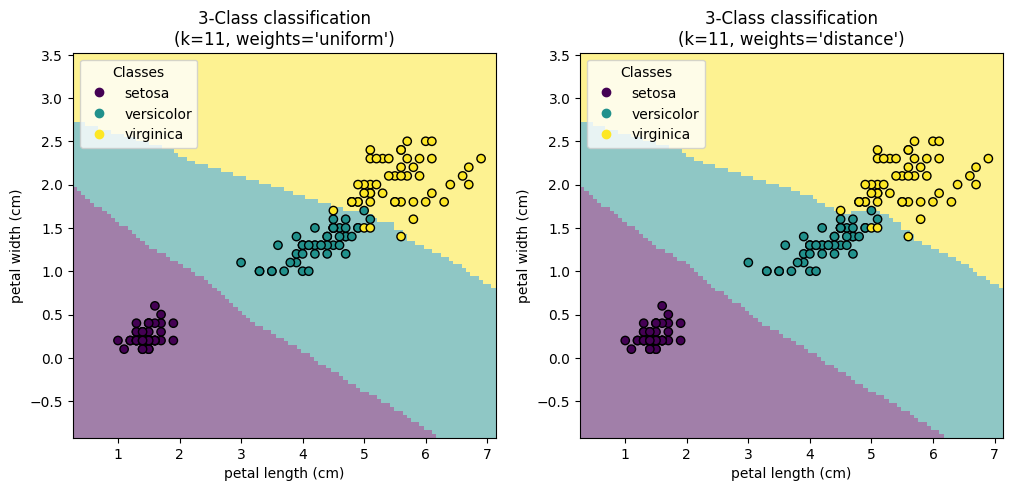

In [416]:
# Show plots.

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[2],
        ylabel=iris.feature_names[3],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="upper left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

In [417]:
# Run cross-validation with five folds.
sk.model_selection.cross_val_score(clf, X, y)

array([0.96666667, 0.96666667, 0.93333333, 0.9       , 1.        ])

In [418]:
# Evaluate the classifier's performance
y_pred = clf.predict(X_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.97


### Sepal Length V's Petal Length

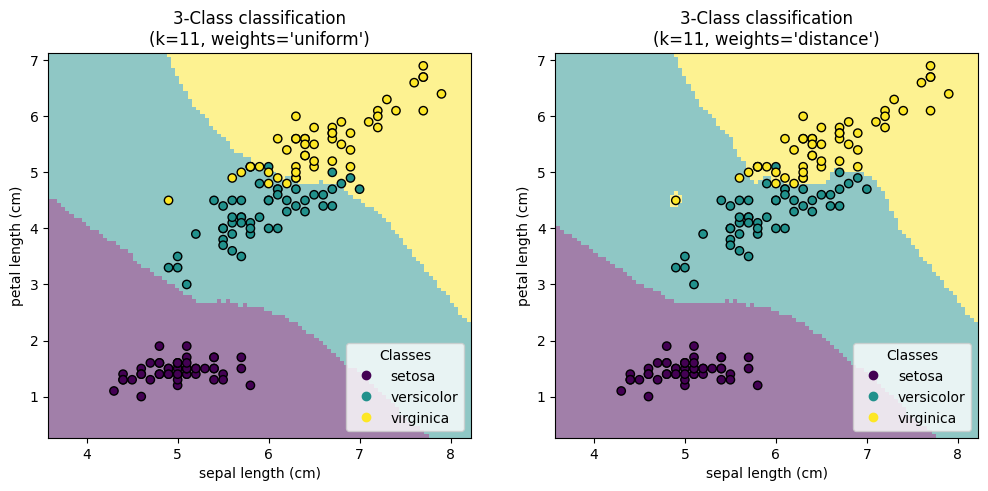

In [419]:
X = iris.data[["sepal length (cm)", "petal length (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

clf = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))])

# Show plots.

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[2],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="lower right",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

In [420]:
# Run cross-validation with five folds.
sk.model_selection.cross_val_score(clf, X, y)

array([0.9       , 1.        , 0.83333333, 0.93333333, 0.96666667])

In [421]:
# Evaluate the classifier's performance
y_pred = clf.predict(X_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


### Sepal Width V's Petal Width 

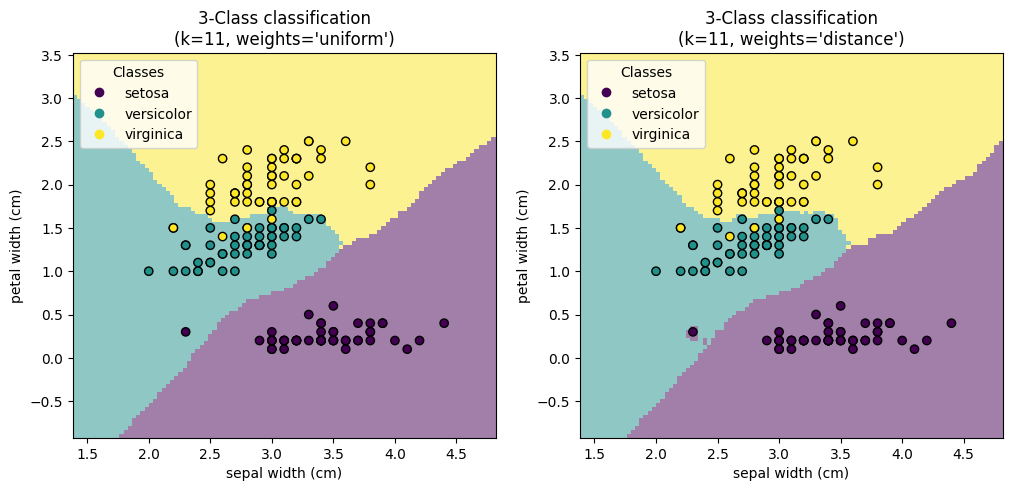

In [422]:
X = iris.data[["sepal width (cm)", "petal width (cm)"]]
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

clf = Pipeline(steps=[("scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=11))])

# Show plots.

_, axs = plt.subplots(ncols=2, figsize=(12, 5))

for ax, weights in zip(axs, ("uniform", "distance")):
    clf.set_params(knn__weights=weights).fit(X_train, y_train)
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X_test,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=iris.feature_names[1],
        ylabel=iris.feature_names[3],
        shading="auto",
        alpha=0.5,
        ax=ax,
    )
    scatter = disp.ax_.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, edgecolors="k")
    disp.ax_.legend(
        scatter.legend_elements()[0],
        iris.target_names,
        loc="upper left",
        title="Classes",
    )
    _ = disp.ax_.set_title(
        f"3-Class classification\n(k={clf[-1].n_neighbors}, weights={weights!r})"
    )

plt.show()

In [423]:
# Run cross-validation with five folds.
sk.model_selection.cross_val_score(clf, X, y)

array([0.96666667, 0.96666667, 0.9       , 0.93333333, 0.96666667])

In [424]:
# Evaluate the classifier's performance
y_pred = clf.predict(X_test)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.92


The setosa class is easilibly seperted from the other two classes using the scatter plot with different colours for each of the classes. 

In [425]:
iris_data = pd.read_csv('data/iris.csv')

In [426]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [427]:
iris_data.replace([np.inf, -np.inf], np.nan, inplace=True)

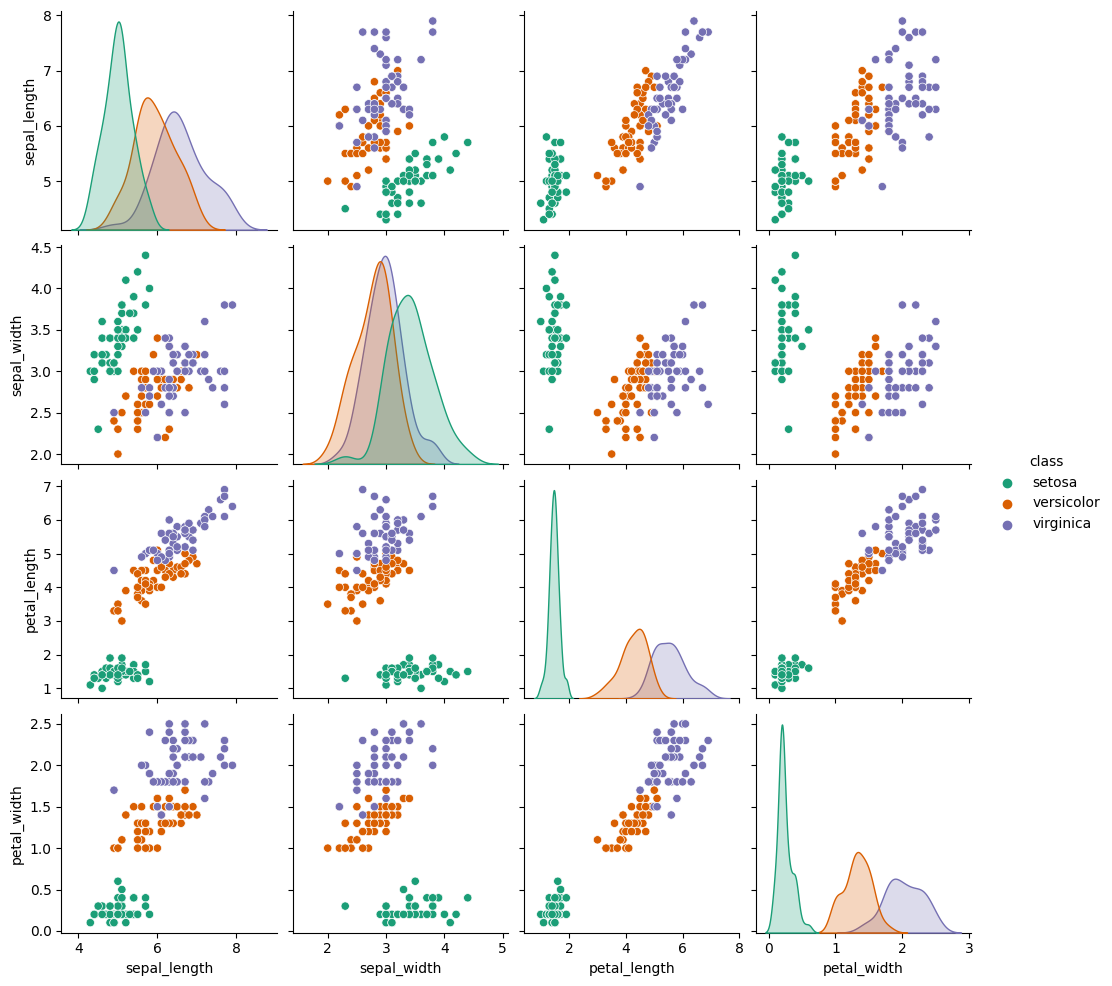

In [428]:
sns.pairplot(iris_data, hue = 'class', palette = 'Dark2')


***

### Task 5 Principal Component Analysis

Perform Principal Component Analysis on the iris data set reducing the number of dimensions to two. Explain the purpose of the analysis and your results.

In [429]:
# Show data again.
iris_data

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [430]:
# Keep only continuous variables.
iris = iris_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# Show.
iris

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [431]:
# Create a standard scaler.
scaler = pre.StandardScaler()

# Show.
scaler

StandardScaler()

In [432]:
# Fit the data to the scaler.
scaler.fit(iris)

StandardScaler()

In [433]:
# Show the means and variances.
scaler.mean_, scaler.var_

(array([5.84333333, 3.054     , 3.75866667, 1.19866667]),
 array([0.68112222, 0.18675067, 3.09242489, 0.57853156]))

In [434]:
# Verify the above.
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [435]:
# Transformed iris array.
iris_transformed = scaler.transform(iris)


In [436]:
# Means.
iris_transformed.mean(axis=0)

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [437]:
# Standard dev.
iris_transformed.std(axis=0)

array([1., 1., 1., 1.])

In [438]:
# Differences squared between first and last row.
(iris_transformed[0] - iris_transformed[-1])**2

array([0.93962578, 1.33868331, 4.42694665, 4.42499631])

In [439]:
# Original column names.
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [440]:
# Re-create data frame.
df_iris_trans = pd.DataFrame(iris_transformed, columns=iris.columns)

# Show.
df_iris_trans

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [441]:
# Create a new PCA instance.
pca = dec.PCA(n_components=2)

In [442]:
# Fit the data to pca.
pca.fit(iris)

PCA(n_components=2)

In [443]:
# Show the variablity.
pca.explained_variance_ratio_

array([0.92461621, 0.05301557])

In [444]:
# Transform X.
iris_pca = pca.transform(iris)

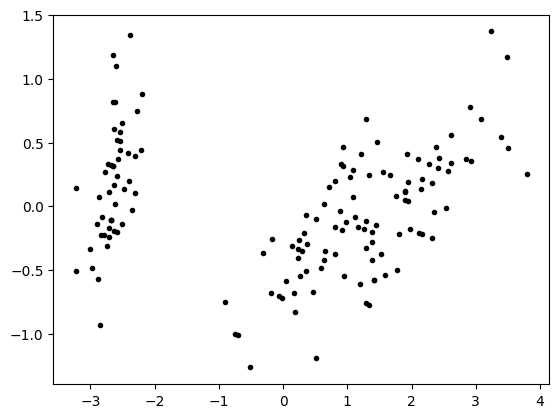

In [445]:
# Create an empty plot.
fig, ax = plt.subplots()

# Plot scatter plot.
ax.plot(iris_pca[:, 0], iris_pca[:, 1], 'k.')

In [446]:
# Original classifications.
df_pca = pd.DataFrame(iris_data[['class']])

# Show.
df_pca

,class
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [447]:
# Incorporate our PCA variables.
df_pca['pca0'] = iris_pca[:, 0]
df_pca['pca1'] = iris_pca[:, 1]

# Show.
df_pca

,class,pca0,pca1
0,setosa,-2.684207,0.326607
1,setosa,-2.715391,-0.169557
2,setosa,-2.889820,-0.137346
3,setosa,-2.746437,-0.311124
4,setosa,-2.728593,0.333925
...,...,...,...
145,virginica,1.944017,0.187415
146,virginica,1.525664,-0.375021
147,virginica,1.764046,0.078519
148,virginica,1.901629,0.115877


In [448]:
df_pca.replace([np.inf, -np.inf], np.nan, inplace=True)

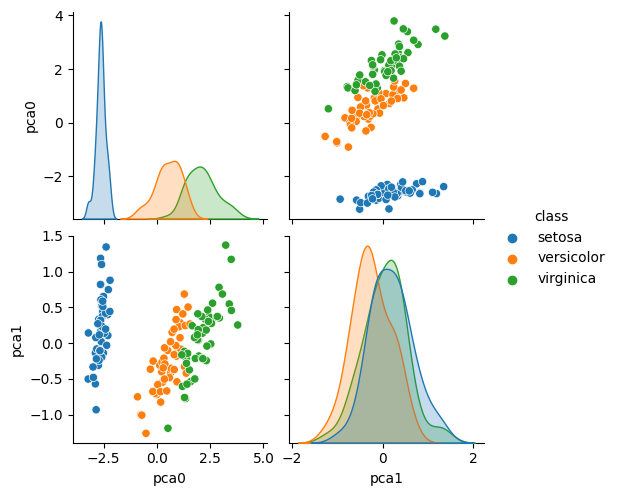

In [449]:
# Pair plot.
sns.pairplot(df_pca, hue='class')

In [450]:
# The scaled data.
df_iris_trans

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [451]:
# Create a new PCA instance.
pca = dec.PCA(n_components=2)

# Fit the scaled data.
pca.fit(df_iris_trans)

# Transform.
X_trans_pca = pca.transform(df_iris_trans)

# Original classifications.
df_trans_pca = pd.DataFrame(iris_data[['class']])

# Incorporate our PCA variables.
df_trans_pca['pca0'] = iris_pca[:, 0]
df_trans_pca['pca1'] = iris_pca[:, 1]

# Show.
df_trans_pca

,class,pca0,pca1
0,setosa,-2.684207,0.326607
1,setosa,-2.715391,-0.169557
2,setosa,-2.889820,-0.137346
3,setosa,-2.746437,-0.311124
4,setosa,-2.728593,0.333925
...,...,...,...
145,virginica,1.944017,0.187415
146,virginica,1.525664,-0.375021
147,virginica,1.764046,0.078519
148,virginica,1.901629,0.115877


In [452]:
# Look at the variance.
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

In [453]:
df_trans_pca.replace([np.inf, -np.inf], np.nan, inplace=True)

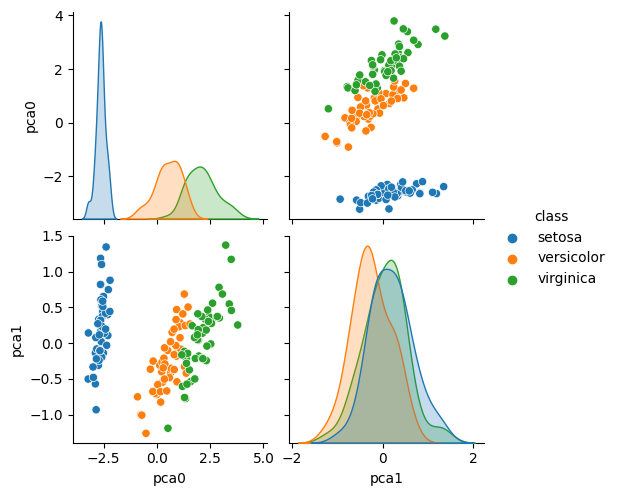

In [454]:
# Pair plot.
sns.pairplot(df_trans_pca, hue='class')

### Compare kNN on scaled and unscaled data

#### Before scaling

In [455]:
# Load the data.
iris = pd.read_csv('data/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [456]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# X data.
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]

# y data.
y = iris['class'].to_numpy()

# Run cross-validation with five folds.
sk.model_selection.cross_val_score(clf, X, y)

array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])

#### After Scaling

In [457]:
# Load the data.
iris = pd.read_csv('data/iris.csv')

# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# X data.
X = iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
  
# Use a standard scaler.
scaler = pre.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

# y data.
y = iris['class'].to_numpy()

# Run cross-validation with five folds.
sk.model_selection.cross_val_score(clf, X, y)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

PCA is a tool for identifying the main axes of variance within a data set and allows for easy data exploration to understand the key variables in the data and spot outliers

# References


[1] Programming and Scripting Module weekly task https://github.com/emma2d/pands-problem-sheet. [Accessed 4 Oct. 2023].

[2] docs.scipy.org. (n.d.). scipy.stats.chi2_contingency — SciPy v1.8.0 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html. [Accessed 16 Oct. 2023].

[3] docs.scipy.org. (n.d.). scipy.stats.chi2_contingency — SciPy v1.8.0 Manual. [online] Available at: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html. [Accessed 16 Oct. 2023].

[4] mwaskom/seaborn-data:Data repositoryfor seaborn examples. Oct. 31, 2023. url: https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv. [Accessed 31 Oct. 2023].

[5] The Pandas Development Team (2022). pandas.DataFrame.info — pandas 1.4.1 documentation. [online] pandas.pydata.org. Available at: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html.
[Accessed 31 Oct. 2023].

[6] https://www.hackdeploy.com/python-t-test-a-friendly-guide/. [Accessed 31 Oct. 2023].

[7] www.linkedin.com. (n.d.). Data Science Tutorial in Python. [online] Available at: https://www.linkedin.com/pulse/data-science-tutorial-python-ambica-nandimandalam [Accessed 19 Nov. 2023].

[8] scikit-learn. (n.d.). Nearest Neighbors Classification. [online] Available at: https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbours-plot-classification-py [Accessed 20 Nov. 2023].

[9] hZach (2022). How to Modify a Matplotlib Histogram Color (With Examples). [online] Statology. Available at: https://www.statology.org/matplotlib-histogram-color/. [Accessed 20 Nov. 2023].

[10] Lever, J., Krzywinski, M. and Altman, N. (2017). Principal component analysis. Nature Methods, [online] 14(7), pp.641–642. doi:https://doi.org/10.1038/nmeth.4346. [Accessed 31 Dec. 2023].

***
# End